# Teaching Kids: Random Walk

Imagine you are standing at a point. You flip a coin. 
- If it lands heads (H), you take one step left.
- If it lands tails (T), you take one step right.

After you flip the coin _n_ times, how far will you be from your _original_ point?

This process is called **Random Walk**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from collections import namedtuple

In [2]:
def flip_coin():
    return random.sample([-1,1],1)[0]

In [3]:
def generate_walk(path_length):
    """
    Generate a random walk by flipping a coin 'path_length' times and 
    adding each flip value i.e. -1 OR 1 to the previous flip value.
    Return a list of running total.
    """
    walk = list()
    for x in range(path_length):
        walk.append(flip_coin() + walk[-1] if len(walk) > 0 else flip_coin())
        
    return walk

In [4]:
def plot_walk(walks):
    """
    Helper function to plot random walks in 'walks' (coin flips).
    Each walk is an array of running total of a coin flip and its
    length represent number of coin flips
    """
    plt.figure(figsize=(15,8))
    
    for walk in walks:
        plt.step(range(1, len(walk)+1), walk)
        
    plt.xlabel("# of coin flips")
    plt.ylabel("Sum of coin flips")
    plt.grid(True)
    plt.show()
    #return plt

### Path length of random walk i.e. number of coin flips

In [5]:
path_length = 100

### Generate one random walk and plot it

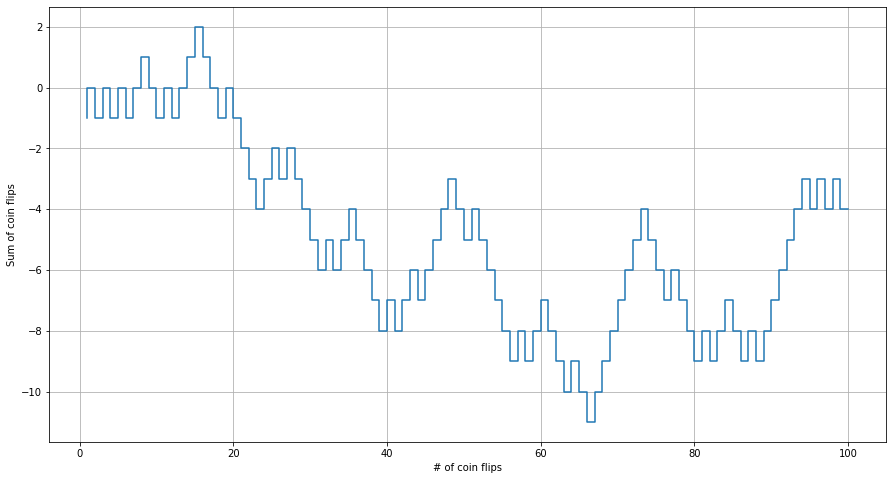

In [6]:
plot_walk([generate_walk(path_length)])

### Now generate 5 random walks and plot them

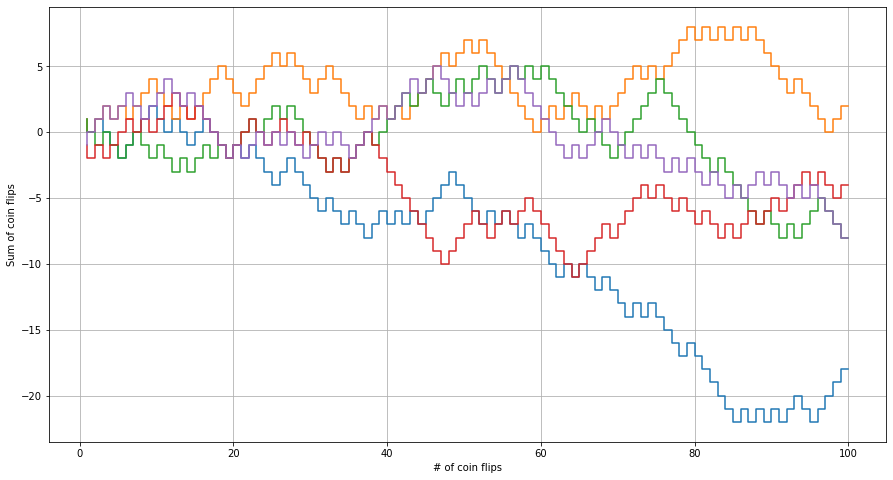

In [7]:
plot_walk([generate_walk(path_length) for _ in range(5)])

### Let's do 100 random walks
The plot below is crowded but there are some interesting features we can start observing. We are beginning to see edge cases - these are the walks, which have the max and min cumulative sums

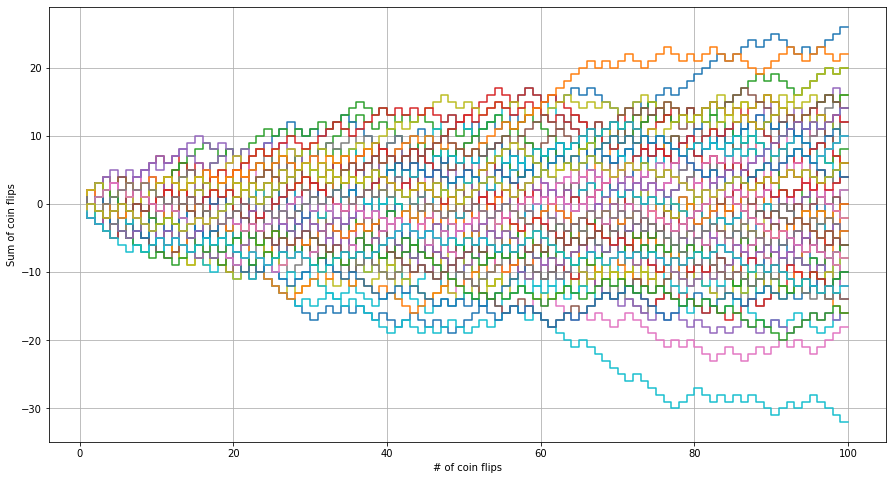

In [8]:
plot_walk([generate_walk(path_length) for _ in range(100)])

## Let's simulate 10K random walks 
This will give us a good sense of distribution and allow us to _filter down_ to the most 'interesting' ones

In [9]:
simulate_walks = [generate_walk(path_length) for _ in range(10000)]

### Generate interesting stats before we filter down

In [10]:
cumulative_sums = [walk[-1] for walk in simulate_walks]
max_sum = max(cumulative_sums)
min_sum = min(cumulative_sums)
mean_sum = sum(cumulative_sums)/len(cumulative_sums)
print('Max sum: {0}'.format(max_sum))
print('Min sum: {0}'.format(min_sum))
print('Average: {0}'.format(mean_sum))
print('5th Percentile: {0}'.format(np.percentile(cumulative_sums, 5)))
print('50th Percentile: {0}'.format(np.percentile(cumulative_sums, 50)))
print('95th Percentile: {0}'.format(np.percentile(cumulative_sums, 95)))

Max sum: 40
Min sum: -36
Average: -0.0628
5th Percentile: -16.0
50th Percentile: 0.0
95th Percentile: 16.0


### Of the 10k walks, how many added to zero i.e. brought you back to the origin point?

In [11]:
zero_sum = list(filter(lambda x:x[-1] == 0, simulate_walks))
print("# of walks summing to zero: {0}".format(len(zero_sum)))
print("% of walks summing to zero: {0}".format(len(zero_sum)/len(cumulative_sums)*100))                

# of walks summing to zero: 753
% of walks summing to zero: 7.53


#### Plot these "zero sum" walks
Notice _all_ these walks converge to 0 when number of flips reach 100

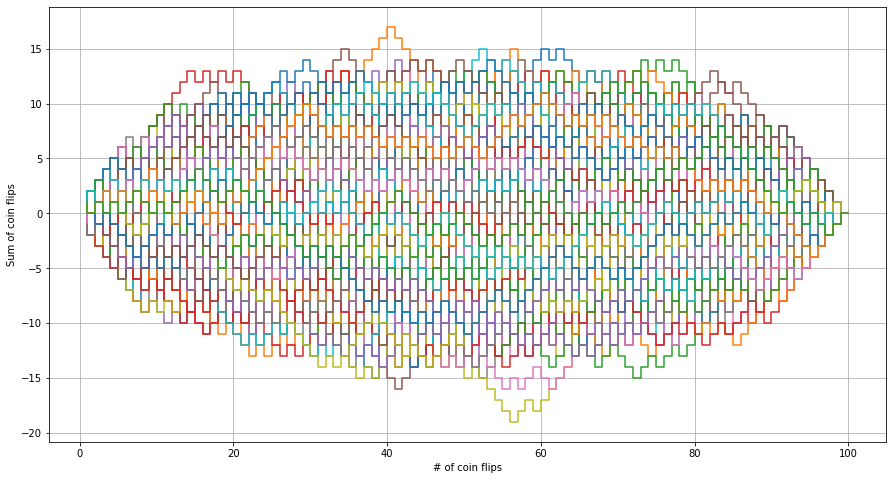

In [12]:
plot_walk(zero_sum)

### Demonstrate the most and least probable random walks
Filter down simulated random walks by picking the ones, which had max and min sum

In [13]:
max_sum_walk = list(filter(lambda x:x[-1] == max_sum, simulate_walks))[0]
min_sum_walk = list(filter(lambda x:x[-1] == min_sum, simulate_walks))[0]

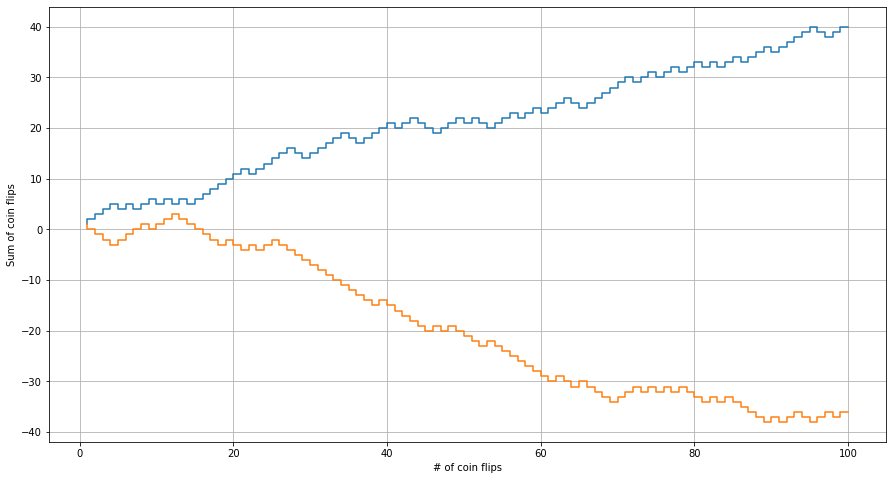

In [14]:
plot_walk([max_sum_walk, min_sum_walk])

### How does the frequency distribution look like?

(array([5.000e+00, 1.900e+01, 3.800e+01, 1.160e+02, 2.620e+02, 5.230e+02,
        8.880e+02, 1.255e+03, 1.525e+03, 7.530e+02, 1.551e+03, 1.267e+03,
        8.610e+02, 5.100e+02, 2.480e+02, 1.050e+02, 5.300e+01, 1.800e+01,
        2.000e+00, 1.000e+00]),
 array([-36. , -32.2, -28.4, -24.6, -20.8, -17. , -13.2,  -9.4,  -5.6,
         -1.8,   2. ,   5.8,   9.6,  13.4,  17.2,  21. ,  24.8,  28.6,
         32.4,  36.2,  40. ]),
 <a list of 20 Patch objects>)

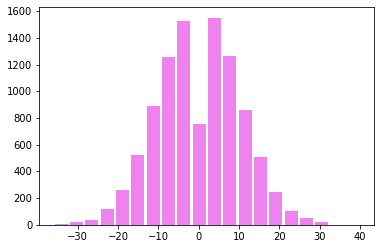

In [15]:
plt.hist(cumulative_sums, bins=20, color='violet', rwidth=0.85)

## In a random walk of length 100, can we ever get the cumulative sum of 100 or -100?
That is, can we get heads H<sup>100</sup> times or tails T<sup>100</sup> in successive 100 coin flips?
The answer is yes, but probability is:

$P(H^{100})\:or\:P(T^{100}) = \frac{1}{2^{100}}$

Let's compute this value

In [16]:
print(1/2**100)

7.888609052210118e-31


# Random walk in 2D plane
On a 2D plane, assume that we can move in 4 directions - up, down, right, left. Instead of a coin, we will rely on an _abstract_ compass, which tells us to go either east, west, north or south every time we take a step. Each of the 4 outcomes are **_equally likely_**. We start from a home coordinates (0,0). 

Some questions, which come to mind are:
- What does random walk look like in a 2D plane? 
- What is the _farthest_ we will go from home? 
- How _far_ are we from home when we stop?
- How many times did we _touch_ home during our walk?

In [17]:
Move = namedtuple('Move','x y')

compass = {'E':Move(1,0), 'W':Move(-1,0), 
           'N':Move(0,1), 'S':Move(0,-1)}

In [18]:
class Position:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __str__(self):
        return 'x={0},y={1}'.format(self.x, self.y)
    
    def __repr__(self):
        return str(self)
    
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
# Ensure Position class handles equality checks correctly
assert(Position(0,0) == Position(0,0))
assert(Position(0,1) != Position(0,0))
assert(Position(1,0) != Position(0,0))
assert(Position(-1,0) != Position(0,0))

In [19]:
def random_compass(position):
    """ 
    Given an input point (x,y), move east or west or north or south, and
    return the new position (x,y)
    """
    # Pick one of the random directions to go (E,W,N,S)
    direction = random.sample(compass.keys(),1)[0]
    return Position(position.x + compass[direction].x, 
                    position.y + compass[direction].y)

In [20]:
def random_2d_walk(steps):
    """
    Starting from (0,0), use or compass to build a path of length 'steps'
    and return it
    """
    assert(steps > 0)
    # Make (0,0) as origin
    path = [Position(0,0)]     
    for _ in range(steps):
        path.append(random_compass(path[-1]))
        
    return path

#### Plotting 2D walk

In [21]:
def plot_2d_walk(path):
    
    plt.figure(figsize=(15,8))
    axis = plt.gca()
    # Hide axis labels to create an empty box
    #axis.axes.xaxis.set_visible(False)
    #axis.axes.yaxis.set_visible(False)
    axis.set_aspect('equal', adjustable='box')
    plt.grid(True)
    # Markers for start and end locations
    plt.plot(path[0].x, path[0].y, marker='o', color='k')
    plt.plot(path[-1].x, path[-1].y, marker='*', color='r', markersize=12)
    
    plt.plot([point.x for point in path], [point.y for point in path], linewidth=2)

### Do 100 steps random walk

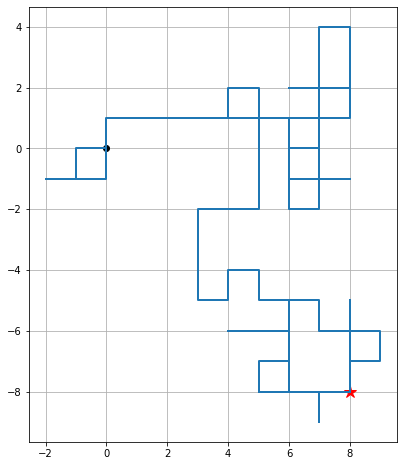

In [22]:
plot_2d_walk(random_2d_walk(100))

### Do 10k steps random walk

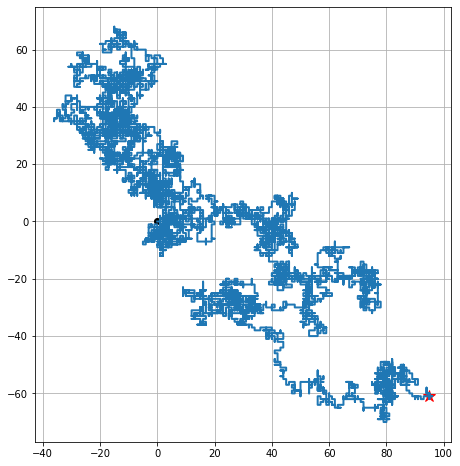

In [23]:
plot_2d_walk(random_2d_walk(10000))

## How many times did we _go through_ home?
We will create a function to help us find matching positions in the random walk path. We will use it to find number of time we will cross origin (home)

In [24]:
def find_matching_pos(path, pos):
    """
    Find positions in our random walk path matching 'pos'.
    Return indices of all matches
    """
    return [ndx+1 for ndx, p in enumerate(path) if p == pos]

In 10k steps walk, did we ever reach home? In the result below, we will ignore first result because that's our starting position. Then we will do 1000 such walks and see if any pattern emerges showing any relationship between number of steps and crossing home coordinates.

In [25]:
import itertools

In [36]:
def walk_thru_home(steps_per_walk, total_walks):
    """
    Generate random walks of steps 'steps_per_walk'. Repeat this for
    'total_walks'. Find all steps, which went through home.
    Return steps, which intersected with origin (0,0)
    """
    home_visits = [find_matching_pos(random_2d_walk(steps_per_walk), Position(0,0))[1:]
                   for _ in range(total_walks)]
    #return list(itertools.chain(*home_visits))
    return home_visits

In [27]:
def plot_steps_to_home(visits):
    plt.figure(figsize=(15,8))
    plt.xlabel("Steps")
    plt.ylabel("Frequency")
    plt.gca().set_title("# of crossings thru home: {0}".format(len(visits)))
    plt.grid(True)
    plt.hist(visits, bins=20, color='violet', rwidth=0.85)

### Generate 100 random walks each with 10k steps

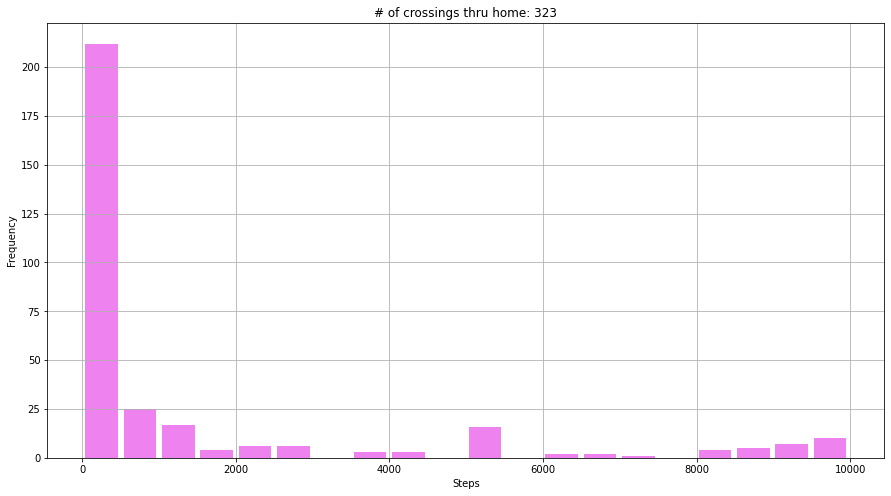

In [38]:
visits_100 = walk_thru_home(steps_per_walk=10000, total_walks=100)
plot_steps_to_home(list(itertools.chain(*visits_100)))

The histogram above suggests that the initial set of steps of the walks take us through home. This makes sense intuitively since at the start, we are close to home. Does it change if we increase the number of walks for simulation?

In [30]:
visits_100.count(9999)

0

### Generate 1000 random walks each with 10k steps

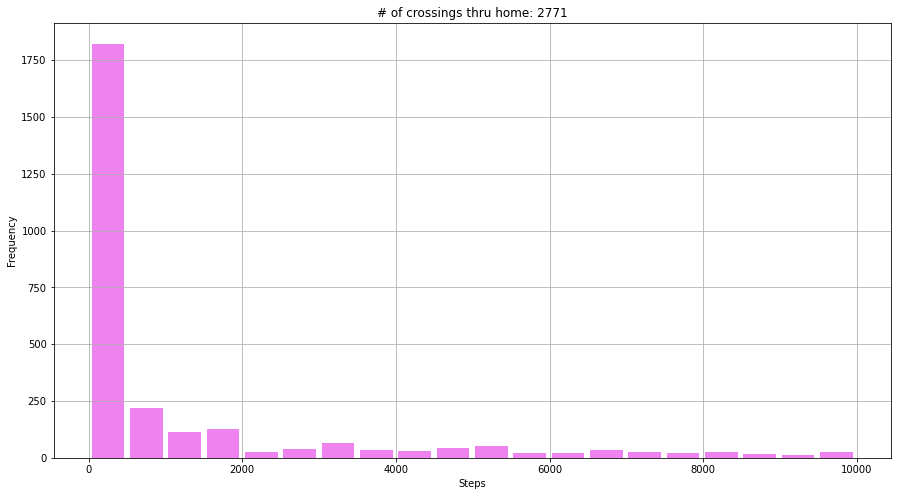

In [41]:
visits_1k = walk_thru_home(steps_per_walk=10000, total_walks=1000)
plot_steps_to_home(list(itertools.chain(*visits_1k)))

## How many of these walks __ended__ back home?

In [40]:
print('Farthest we travelled (steps) before reaching home:', max(visits_1k))

Farthest we travelled (steps) before reaching home: [9325]


In [43]:
top_10 = sorted(visits_1k, reverse=True)[1:10]
print('Top 10 walks which ended closest to home:', top_10)

Top 10 walks which ended closest to home: [[9827, 9829, 9831], [9667, 9765, 9839], [9659, 9663], [8397], [8237, 8239, 8253, 8255, 8265, 8267, 8287, 8433], [8051, 8077, 8081], [7367, 7369], [7001, 7005, 7009, 7015, 7017, 8529, 8531], [6699, 6721, 6967, 6973, 6975]]
